# Preprocessing Sentinel-1 SAR GRD Images

### 1. Convert to GeoTIFF with SRS
$ *gdalwarp -r bilinear -t_srs EPSG:32648 **VV_BAND_TIFF** **DESTINATION_TIF**  *

Example: 
$ *gdalwarp -r bilinear -t_srs EPSG:32648 **S1A_IW_GRDH_1SDV_20180630T223706_20180630T223734_022592_027296_6391.SAFE/measurement/s1a-iw-grd-vv-20180630t223706-20180630t223734-022592-027296-001.tiff sar.tif** *

### (optional) 2. Scale  data to range for easier processing

$ *gdal_translate -ot **Type** -scale **old range** ** new range ** **SOURCE_TIFF** **DESTINATION_TIF**  *

**Type** = {Int16, Byte, Float32, ....}

**range** = min max

Example: 
$ *gdal_translate -ot **Byte** -scale **0 700 0 255 sar.tif sar_2.tif** *

# Maskout SAR

In [1]:
import rasterio
import numpy as np
from matplotlib import pyplot
import geopandas as gpd
import os, math
from matplotlib import pyplot as plt
from utils.landsatHepers import *

vn_reservoirs_path = 'vnreservoirs/VN_Reservoirs.shp'
df = gpd.read_file(vn_reservoirs_path)
plt.rcParams['figure.figsize'] = 7, 7
ho_tri_an = df[df.AREA_SKM == 277.4]

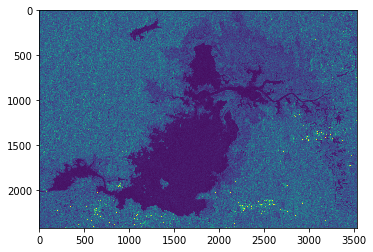

In [15]:
fnDs = 'Sentinel1/sar_2.tif'
src = rasterio.open(fnDs, 'r')
data, _ = getMaskFromShape(ho_tri_an, src,eps=1000)
pyplot.imshow(data)

In [24]:
fnDs = 'Sentinel1/sar.tif'
src_ = rasterio.open(fnDs, 'r')

/home/anhldt/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint16 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


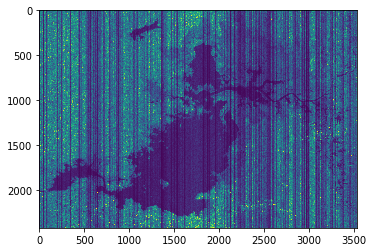

In [28]:
from sklearn.preprocessing import MinMaxScaler

data_, _ = getMaskFromShape(ho_tri_an, src_, eps=1000)
scaler = MinMaxScaler(feature_range=(0, 255))
scaler = scaler.fit(data_)
data_ = scaler.transform(data_).astype('uint8')
pyplot.imshow(data_)

In [29]:
data.dtype

dtype('uint8')